<a href="https://colab.research.google.com/github/Prartz/Technohac/blob/main/Task1_Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tensorflow

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [6]:
import pandas as pd
df = pd.read_csv("Tweets.csv")

In [7]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [8]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [9]:
review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [11]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [12]:
tweet = review_df.text.values

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [14]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [18]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 96s 316ms/step - loss: 0.3933 - accuracy: 0.8372 - val_loss: 0.2042 - val_accuracy: 0.9264
Epoch 2/5
289/289 [==============================] - 83s 286ms/step - loss: 0.2158 - accuracy: 0.9163 - val_loss: 0.1739 - val_accuracy: 0.9381
Epoch 3/5
289/289 [==============================] - 83s 287ms/step - loss: 0.1630 - accuracy: 0.9374 - val_loss: 0.1800 - val_accuracy: 0.9446
Epoch 4/5
289/289 [==============================] - 82s 282ms/step - loss: 0.1282 - accuracy: 0.9545 - val_loss: 0.1687 - val_accuracy: 0.9437
Epoch 5/5
289/289 [==============================] - 83s 288ms/step - loss: 0.1100 - accuracy: 0.9606 - val_loss: 0.1819 - val_accuracy: 0.9402


In [19]:
train_accuracy = history.history['accuracy']

val_accuracy=history.history['val_accuracy']

for epoch in range(len(train_accuracy)):

    print(f"Epoch {epoch+1} - Training Accuracy: {train_accuracy[epoch]}, Validation Accuracy: {val_accuracy[epoch]}")

Epoch 1 - Training Accuracy: 0.8371967077255249, Validation Accuracy: 0.9263750314712524
Epoch 2 - Training Accuracy: 0.9162694811820984, Validation Accuracy: 0.9380684494972229
Epoch 3 - Training Accuracy: 0.9373916983604431, Validation Accuracy: 0.9445647597312927
Epoch 4 - Training Accuracy: 0.9545060396194458, Validation Accuracy: 0.9436985850334167
Epoch 5 - Training Accuracy: 0.9605719447135925, Validation Accuracy: 0.9402338862419128


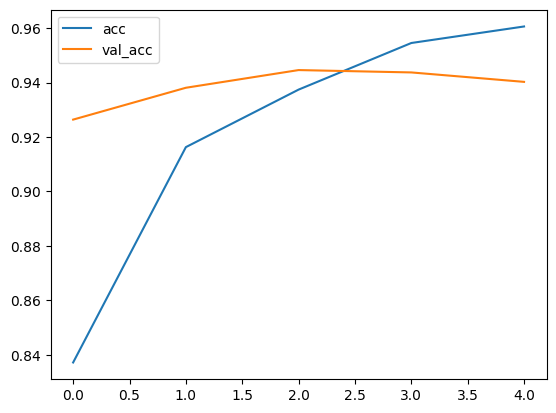

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

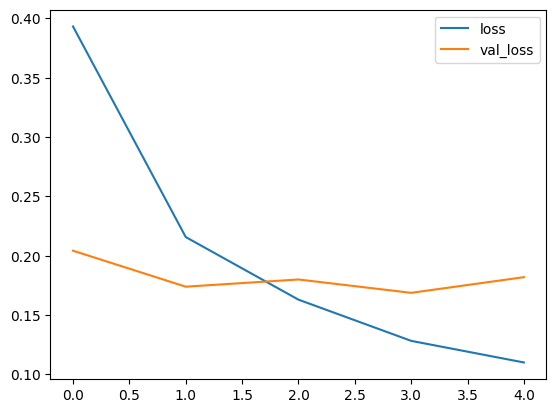

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [22]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [27]:
newreview1=input("Enter Your Review ")
predict_sentiment(newreview1)
while True:
    new_review = input("Enter Your Review ('q' to quit): ")

    if new_review.lower() == 'q':
        break

    predict_sentiment(new_review)

Enter Your Review It was a horrible Experience
1/1 [==============================] - 0s 38ms/step
Predicted label:  negative
Enter Your Review ('q' to quit): i had a nice time
1/1 [==============================] - 0s 38ms/step
Predicted label:  positive
Enter Your Review ('q' to quit): q
